In [1]:
import sys
sys.path.insert(0, '/home/yao/keras-deeplab-v3-plus')

from model import Deeplabv3

Using TensorFlow backend.


In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
import seaborn as sns

import keras
from keras import metrics
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.models import model_from_json
from keras.callbacks import EarlyStopping

from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, precision_score, recall_score, log_loss, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score

In [3]:
from tf_unet import image_util
from tf_unet import unet
from tf_unet import util

In [21]:
output_path = "./trained_DeepLabv3_no_activation_LR1_epoch100_data_trainset_20190717"

#traininig parameters
batch_size = 1
epochs = 100
LR = 1
BACKBONE = 'mobilenetv2'

Number of files used: 26
Number of channels: 1
Number of classes: 2
(26, 1000, 1000, 1)
(26, 1000, 1000, 2)
Number of files used: 6
Number of channels: 1
Number of classes: 2


2020-04-21 11:00:33,903 Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(26, 1000, 1000, 3)
(26, 1000, 1000, 1)
1.0
-1.0
1.0
0.0


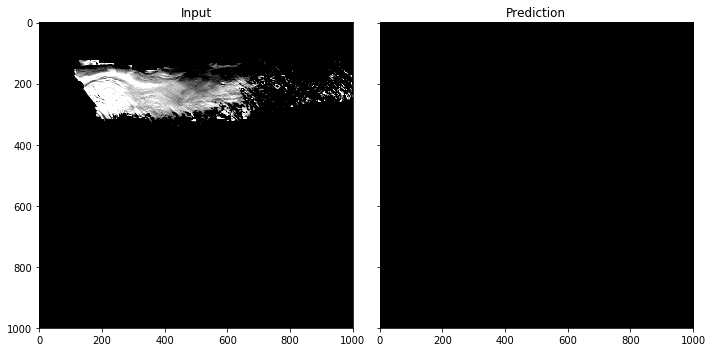

In [24]:
# prepare data

training_data = image_util.ImageDataProvider("./data_trainset_20190717/*.tif")
i=26 #number of images
x_train, y_train = training_data(i)  #max=1, min=0
print(x_train.shape)
print(y_train.shape)

test_data = image_util.ImageDataProvider("./data_testset_random_20190812/*.tif")
i=6 #number of images
x_test, y_test = test_data(i)

train_x = np.stack((x_train[...,0],x_train[...,0],x_train[...,0]), axis = 3) #input size has to  be 3 channels
test_x = np.stack((x_test[...,0],x_test[...,0],x_test[...,0]), axis = 3)
train_x = train_x/0.5 -1
test_x = test_x/0.5 -1

#fix dimension
train_y= np.stack([y_train[...,1]], axis = 3)
test_y= np.stack([y_test[...,1]], axis = 3)

# display
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
ax[0].imshow(train_x[0,...], aspect="auto")
ax[1].imshow(train_y[0,...,0], aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Prediction")
fig.tight_layout()

print(train_x.shape)
print(train_y.shape)
print(max(train_x.flatten()))
print(min(train_x.flatten()))
print(max(train_y.flatten()))
print(min(train_y.flatten()))

In [7]:
model = Deeplabv3(weights=None, input_shape=(1000,1000, 3), classes=1, backbone=BACKBONE)
model.summary()
model.compile(keras.optimizers.SGD(LR) ,
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


2020-04-21 01:16:07,458 From /home/yao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2020-04-21 01:16:11,499 From /home/yao/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1000, 1000, 3 0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 500, 500, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 500, 500, 32) 128         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 500, 500, 32) 0           Conv_BN[0][0]                    
__________________________________________________________________________________________________
expanded_c

In [14]:
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1)#,

Epoch 1/100
26/26 [==============================] - 254s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 251s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 248s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 247s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 248s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 248s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 7/100
26/26 [==============================] - 249s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 8/100
26/26 [==============================] - 249s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 9/100
26/26 [==============================] - 248s 10s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 10/100
26/26 [==============================] - 248s 10s/step - loss: 0.1038 - acc: 0.0000e+00

26/26 [==============================] - 244s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 83/100
26/26 [==============================] - 247s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 84/100
26/26 [==============================] - 246s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 85/100
26/26 [==============================] - 245s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 86/100
26/26 [==============================] - 245s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 87/100
26/26 [==============================] - 245s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 88/100
26/26 [==============================] - 244s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 89/100
26/26 [==============================] - 245s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 90/100
26/26 [==============================] - 245s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 91/100
26/26 [==============================] - 245s 9s/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 92/100


In [22]:
## SAVE MODEL
import os

# detect the current working directory and print it
os.mkdir(output_path)
os.chdir(output_path)

# serialize model to JSON
model_json = model.to_json()
with open(output_path + "model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(output_path + "model.h5")
print("Saved model to disk")

os.chdir('/home/yao/Downloads/keras-deeplab-v3-plus-master/examples') # back to example directory

Saved model to disk


Text(0.5, 1.0, 'Training and validation loss')

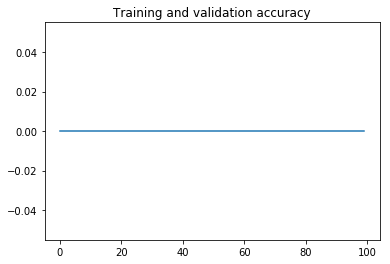

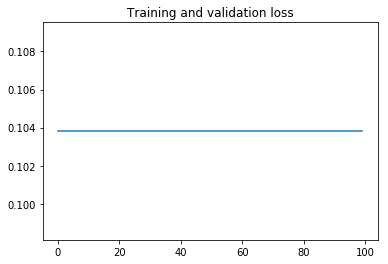

In [15]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']

plt.plot(range(len(acc)), acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(range(len(loss)), loss)
plt.title('Training and validation loss')

## Test performance

In [16]:
# prediction
prediction = model.predict(test_x)
prediction = np.array(prediction)

#prediction = (prediction-min(prediction.flatten()))/(max(prediction.flatten())-min(prediction.flatten())) #doesn't change AUC, AP

test_y_ = test_y.flatten()
test_y_predict = prediction.flatten()

print(max(test_y_predict))
print(min(test_y_predict))
print(max(test_y_))
print(min(test_y_))

-6709.814
-10917.052
1.0
0.0


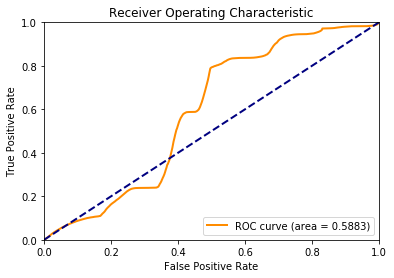

AUC =  0.588304544790649


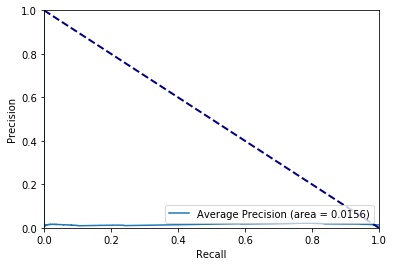

AP =  0.015576176576418677


In [26]:
fpr, tpr, thresholds = roc_curve(test_y_,test_y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
print('AUC = ',roc_auc)

precision, recall, thresholds = precision_recall_curve(test_y_, test_y_predict)
AP = average_precision_score(test_y_, test_y_predict)
plt.figure()
plt.plot(recall, precision, label = 'Average Precision (area = %0.4f)' % AP)
plt.plot([0, 1], [1, 0], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower right')
plt.show()
print('AP = ',AP)

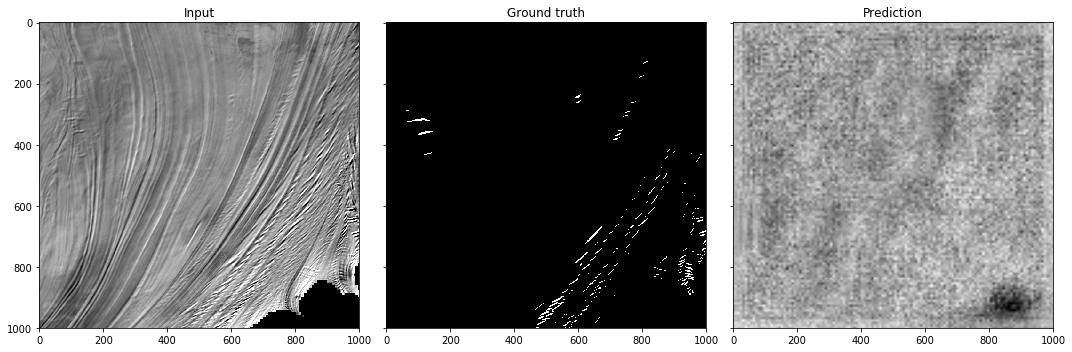

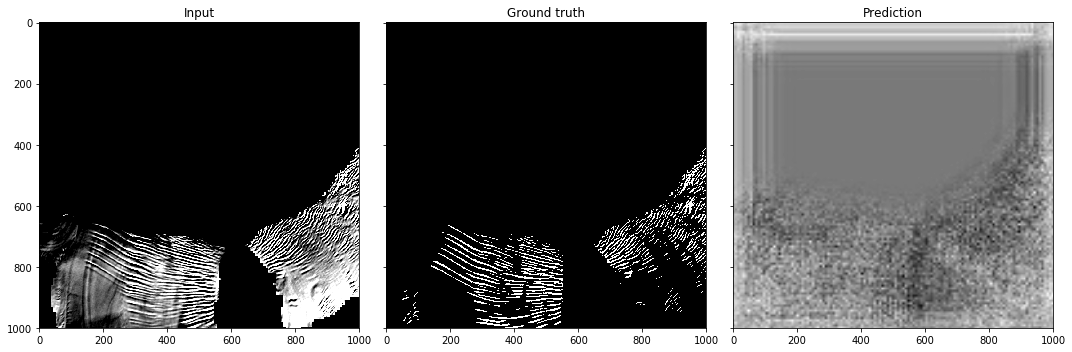

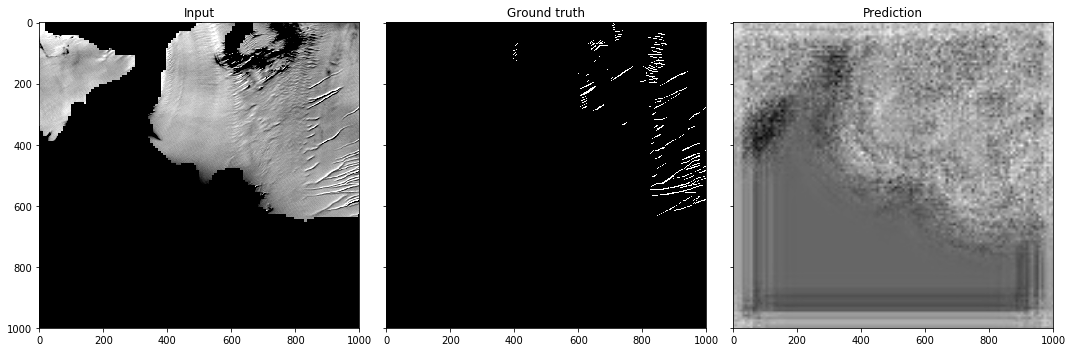

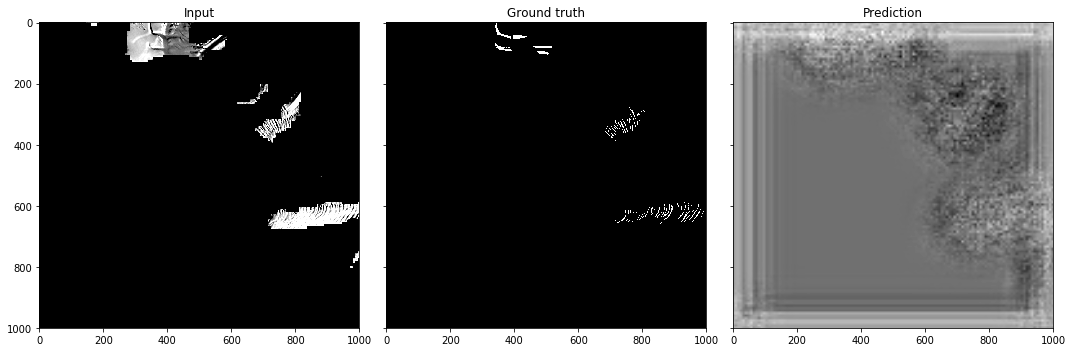

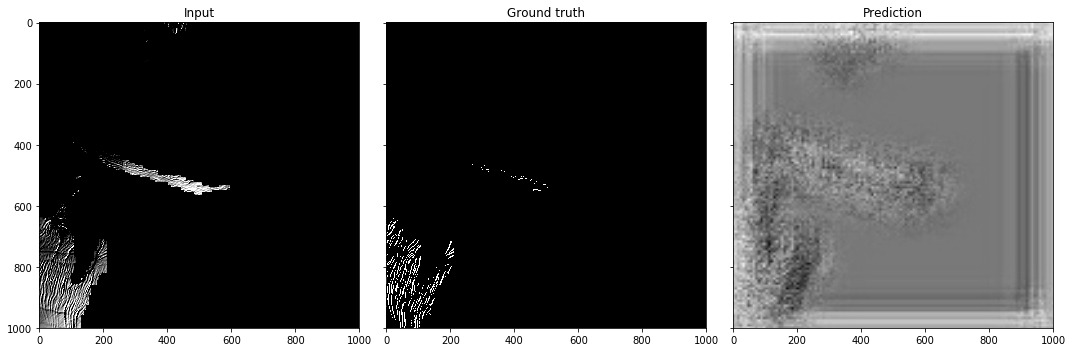

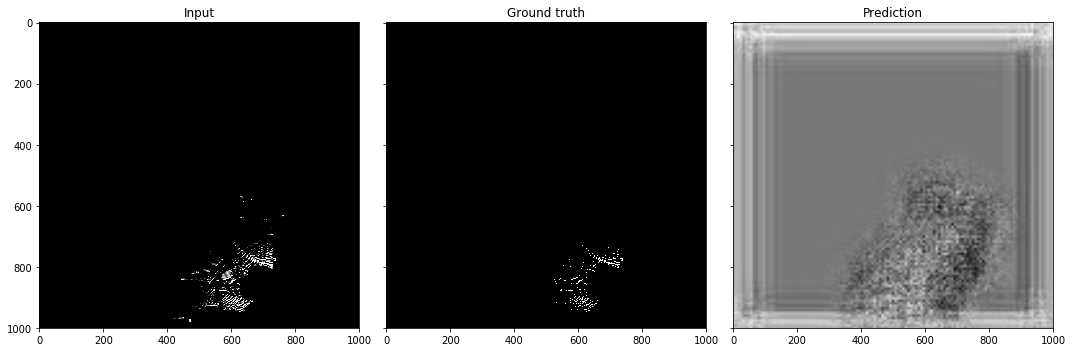

In [27]:
# display
for i in range(0,6):
    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
    ax[0].imshow(test_x[i,...,0], aspect="auto")
    ax[1].imshow(test_y[i,...,0], aspect="auto")
    ax[2].imshow(prediction[i,...,0], aspect="auto")
    ax[0].set_title("Input")
    ax[1].set_title("Ground truth")
    ax[2].set_title("Prediction")
    fig.tight_layout()

## test on Roos ice shelf

In [ ]:
# load json and create model
os.chdir(output_path) #go to model directory

json_file = open(output_path + 'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(output_path + "model.h5")
print("Loaded model from disk")

os.chdir('/home/yao/Downloads/segmentation_models-master/examples') # back to example directory

In [19]:
#prepare test data
test_data = image_util.ImageDataProvider("./data_ross/*.tif")
i=2 #number of images
x_test, y_test = test_data(i)
print(x_test.shape)
print(y_test.shape)
test_x = np.stack((x_test[...,0],x_test[...,0],x_test[...,0]), axis = 3)
test_y= np.stack([y_test[...,1]], axis = 3)
test_x = test_x/0.5 -1

#prediction = loaded_model.predict(test_x)
prediction = model.predict(test_x)
prediction = np.array(prediction)

Number of files used: 2
Number of channels: 1
Number of classes: 2
(2, 1000, 1000, 1)
(2, 1000, 1000, 2)


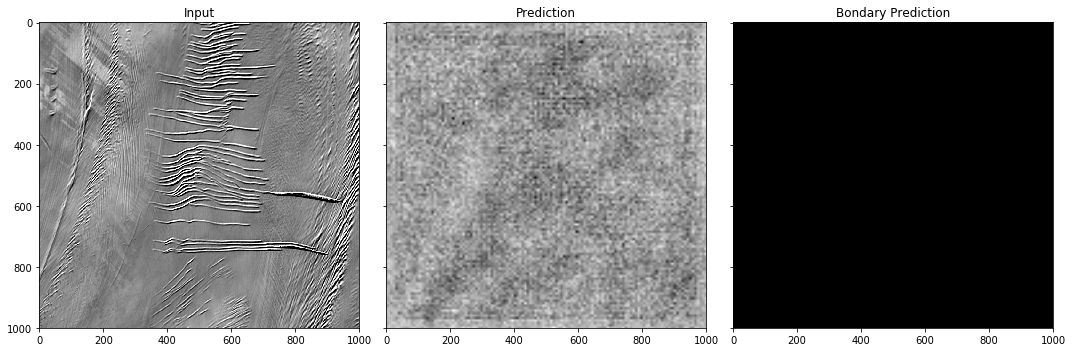

In [20]:
# display
i=0#sample index
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].imshow(x_test[i,...,0], aspect="auto")
ax[1].imshow(prediction[i,...,0], aspect="auto")
mask = prediction[i,...,0] > 0.05
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Prediction")
ax[2].set_title("Bondary Prediction")
fig.tight_layout()